In [296]:
#Arrays and containers
import numpy as np
import pandas as pd

#Plotting
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import plotnine as p9
from plotnine import ggplot, aes, coord_flip, geom_point, geom_line, geom_col, geom_linerange, geom_errorbarh
from plotnine import geom_density, geom_histogram, geom_bar, scale_x_reverse, scale_y_reverse, facet_grid

In [2]:
def annotate_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)


# Matplotlib

[Based on lectures.scientific-python.org](https://lectures.scientific-python.org/intro/matplotlib)
[... and Matplotlib documentations](https://matplotlib.org/)


## Basic

In [ ]:
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)
plt.plot(X, C, label = 'Cosine($\\theta$)') #We can use latex expressions surrounded by money signs ($) 
plt.plot(X, S, label = 'Sine($\\theta$)')
plt.legend(loc='upper left')
plt.title("My basic plot")
plt.xlabel("Radians $\\theta$") 
plt.ylabel("Value trig. function");

plt.show()



In [ ]:
#Costumize
# Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(8, 6), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)

X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)

# Plot cosine with a blue dashed line of width 4 (pixels)
plt.plot(X, C, color="blue", linewidth=4.0, linestyle="--")

# Plot sine with a green continuous line of width 1 (pixels)
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-")

# Set x limits
plt.xlim(-4.0, 4.0)

# Set x ticks
plt.xticks(np.linspace(-4, 4, 9))

# Set y limits
plt.ylim(-1, 1.05)

# Set y ticks
plt.yticks([-1, 0, +1], [r'$-1$', r'$0$', r'$+1$']) #You can change the position and labels of the ticks


#Change splines
# By default, spines are the lines surrounding the figure. 
# We can move them. Comment this and the lines below in or out to check the behavior.
ax = plt.gca()  # gca stands for 'get current axis' i.e. the figure currently active
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

#Annotate
t = 2 * np.pi / 3
plt.plot([t, t], [0, np.cos(t)], color='blue', linewidth=2.5, linestyle="--")
plt.scatter([t, ], [np.cos(t), ], 50, color='blue')

plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t, t],[0, np.sin(t)], color='red', linewidth=2.5, linestyle="--")
plt.scatter([t, ],[np.sin(t), ], 50, color='red')

plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))


# Save figure using 72 dots per inch
# plt.savefig("exercise_2.png", dpi=72)

# Show result on screen
plt.show()

## Subplots

In [ ]:
fig = plt.figure()
fig.suptitle("Controlling subplot sizes with width_ratios and height_ratios") #sizes can be controlled manually, check https://matplotlib.org/stable/gallery/userdemo/demo_gridspec03.html#gridspec-demo

gs = GridSpec(2, 2, width_ratios=[1, 2], height_ratios=[4, 1]) #creates the specifications of grid to put plots. 
ax1 = fig.add_subplot(gs[0]) #this executes the grid specifications
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])

#annotate_axes(fig)
x = np.linspace(0,10)
y = x
ax1.plot(x,y, color = 'green');
x = np.linspace(0,10)
y = x**2
ax4.plot(x,y, color = 'red');
ax4.set_ylim(0,50) #some axis routines have a different syntax (i.e. not .ylim)

## Exercise (load + clean + bar plot)
### First matplotlib plot

1) Load movies.csv and name it "movies" 
2) Print movies head
3) Print movies variable types
4) Print movies dimensions with the routine .shape
4) Clean the variable Weekend gross. Drop from each entry the sign '$' and transform the string values to integer values. Use a for loop and the routine split.
5) Print movies variable types again
6) With matplotlib, plot an horizontal barplot. Name the axis and write the units. 
7) Save the figure as png and pdf.

## Exercise (load + clean + horizontally stacked bar plot)
### A simple plot can be hard in matplotlib

1) Load income_by_age.csv and name it income_age
2) Erase the column "year" from the database
3) Print income_age head
4) Print income_age variable types
5) Print income_age dimensions with the routine .shape
6) Go from a long format to a wide format. Use the routine .pivot. Place the resulting table in a new variable called age_race. Print it.
7) Reset the index with the routine .reset_index(inplace=True). Print age_race again
8) With matplotlib, plot horizontal stacked bars. That is, do in the same figure a barplot of the median income for each age (x-axis) and race.  
One way to do it:  
[matplotlib horizontal stacked bars](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html)





# Seaborn = Matplotlib + Pandas + Stats

[Based on seaborn docs](https://seaborn.pydata.org/tutorial)

In [ ]:
#The same horizontally stacked bars are easier in other more expressive packages.
#Seaborn is an excellent alternative
file = "Claus_Wilke_Book_Fund_Data_Viz/data/csv_files/income_by_age.csv"
income_age = pd.read_csv(file)
plt.figure(figsize=(10,5))
sns.barplot(income_age, x="age", y="median_income", hue="race") 
plt.xlabel('Age')
plt.ylabel('Median income')
plt.ylim(0,105000);

In [ ]:
# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = pd.read_csv("tips.csv")
print(tips)

# Create a visualization
sns.relplot( #plot type
    data=tips, #data to use
    x="total_bill", y="tip", col="time", #col is for column; so two columns: Dinner and Lunch
    hue="smoker", style="smoker", size="size", 
);

In [ ]:
#Seaborn can visualize standard stats, like OLS (do not expect the coeficients and stuff; that later)
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker");

In [ ]:
sns.displot(data=tips, x="total_bill", col="time", kde=True);

In [ ]:
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True);

In [ ]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker");

In [ ]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True);

In [ ]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker");

In [ ]:
sns.jointplot(data=tips, x="total_bill", y="tip", hue="smoker");

In [ ]:
sns.pairplot(data=tips, hue="smoker");

In [ ]:
g = sns.PairGrid(tips, hue="smoker", corner=True) #put the info in an object
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

<img src="plot_types_seaborn.png">

## Exercise (load + clean + heatmap)
Elaborated charts with relatively few lines of code

1) Load the data set Internet_user.csv and put it in a variable called Internet
2) print the name of the columns of Internet
3) print the dimensions of Internet with the routine .shape
4) Make a new data called Internet_R with only these countries:
  Iceland, Norway, Japan, France, United States, Mexico, Argentina, Colombia, Kenya, China.
  Use the routine filter. Important: the parameter items in filter only works on names of rows or columns. Thus, temporarily, make the country code the index, and then use .reset_index(drop=True)
5) Print Internet_R head and confirm it has the same number of rows and the countries you asked for.
6) Make a new reduced data called Internet_hm, with only the years i.e. drop the remaining columns
7) Rename the index of Internet_hm with the country names
8) Rename the axis of Internet_hm with the routine .rename_axis(). Call the columns axis year; the index axis country
8) Make a heatmap with seaborn with Internet_hm. Save the figure as png and pdf.

# Grammar of graphics

### ggplot 
As implemented in P9

In [3]:
#A simple example from p9 documentation
df = pd.DataFrame({
    'letter': ['Alpha', 'Beta', 'Delta', 'Gamma'],
    'pos': [1, 2, 3, 4],
    'num_of_letters': [5, 4, 5, 5]
}) #silly dataset

df

,letter,pos,num_of_letters
0,Alpha,1,5
1,Beta,2,4
2,Delta,3,5
3,Gamma,4,5


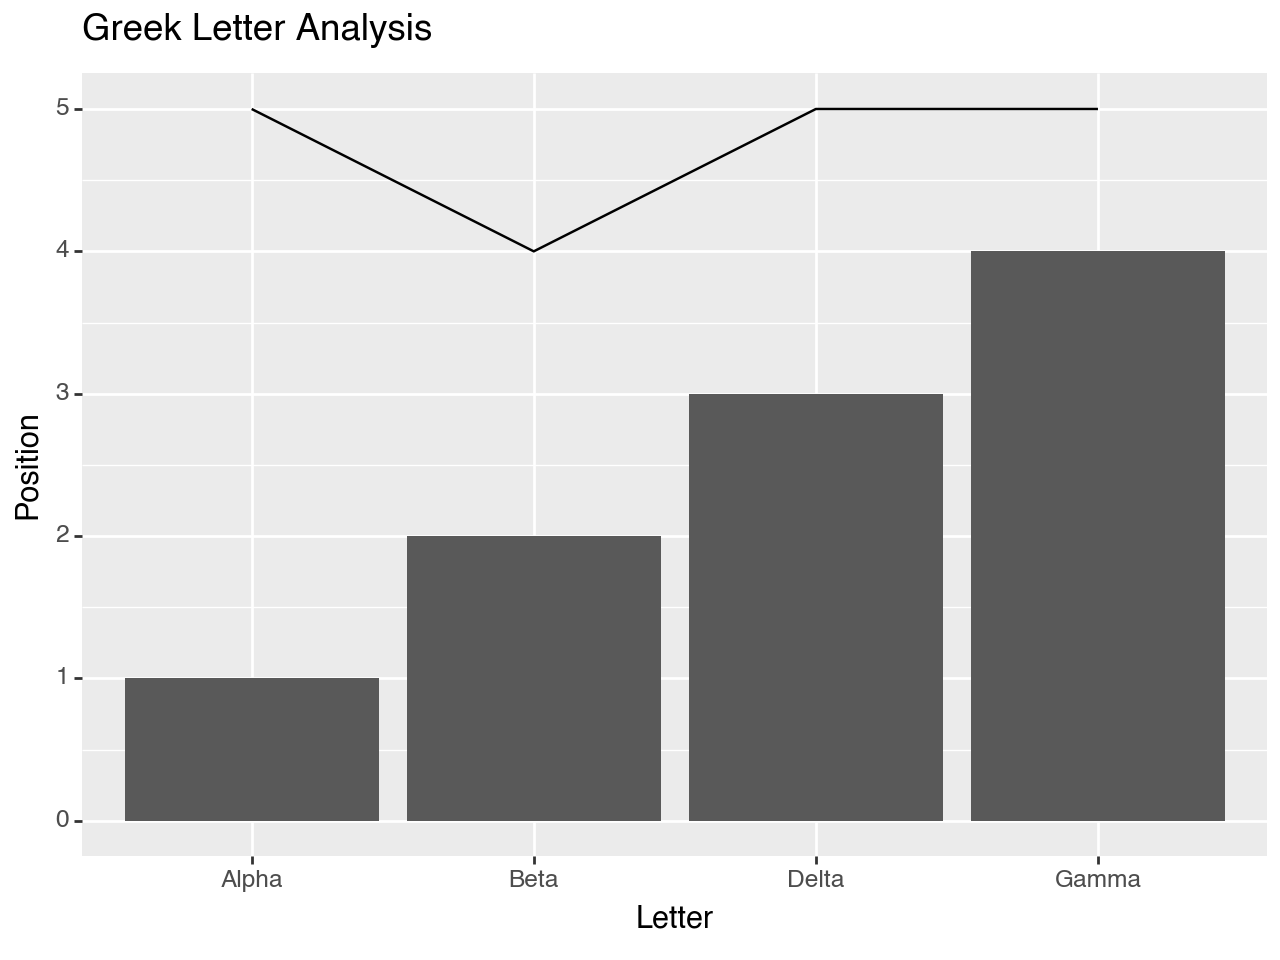

<Figure Size: (640 x 480)>

In [4]:
#This is a nice simple example to see the logic of ggplot grammar of graphics
p = (ggplot(df) #indicate the data to use
 + geom_col(aes(x='letter', y='pos')) #geom 1 (first layer)
 + geom_line(aes(x='letter', y='num_of_letters'), group=1) #geom 2 (second layer)
 + p9.labs(title='Greek Letter Analysis', x = 'Letter', y = 'Position') #misc
)
p

In [5]:
#Forest plot. See an example in google images
#Plan: we want to tell ggplot to paint dots and confidence intervals
#That is, at least two layers.

#Load data set
file = "Claus_Wilke_Book_Fund_Data_Viz/data/csv_files/cacao.csv"
chocolate = pd.read_csv(file)
countries = np.array(['Switzerland', 'Canada', 'Austria', 'U.S.A.', 'Belgium', 'Peru'])
boolean = ""
for c in countries:
    boolean = boolean + c + "|"
chocolate_R = chocolate[chocolate["location"].str.contains(boolean[0:-1])].reset_index(drop=True)
chocolate_R

,company,bean_origin_detailed,REF,review_date,cocoa_percent,location,rating,bean_type,bean_origin
0,Acalli,"Chulucanas, El Platanal",1462,2015,70%,U.S.A.,3.75,NaN,Peru
1,Acalli,"Tumbes, Norandino",1470,2015,70%,U.S.A.,3.75,Criollo,Peru
2,Akesson's (Pralus),"Bali (west), Sukrama Family, Melaya area",636,2011,75%,Switzerland,3.75,Trinitario,Indonesia
3,Akesson's (Pralus),"Madagascar, Ambolikapiky P.",502,2010,75%,Switzerland,2.75,Criollo,Madagascar
4,Akesson's (Pralus),"Monte Alegre, D. Badero",508,2010,75%,Switzerland,2.75,Forastero,Brazil
...,...,...,...,...,...,...,...,...,...
1005,Zotter,Peru,647,2011,70%,Austria,3.75,NaN,Peru
1006,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1007,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1008,Zotter,Kerala State,781,2011,62%,Austria,3.25,NaN,India


In [66]:
Cho_Stats = chocolate_R.groupby(['location']).agg({'rating': ['mean', 'std']}).reset_index(drop=True)
Cho_Stats.insert(0, 'location', list(chocolate_R.groupby(['location']).indices.keys()))
Cho_Stats.columns = ['location', 'mean_rating', 'std_rating']
Cho_Stats.insert(Cho_Stats.shape[1], 'error_left', Cho_Stats.loc[:,'mean_rating'] - Cho_Stats.loc[:,'std_rating'])
Cho_Stats.insert(Cho_Stats.shape[1], 'error_right', Cho_Stats.loc[:,'mean_rating'] + Cho_Stats.loc[:,'std_rating'])
Cho_Stats.columns = ['location', 'mean_rating', 'std_rating', 'error_left', 'error_right']
p = ggplot(Cho_Stats, aes(y = "location")) + p9.theme_classic()
#p

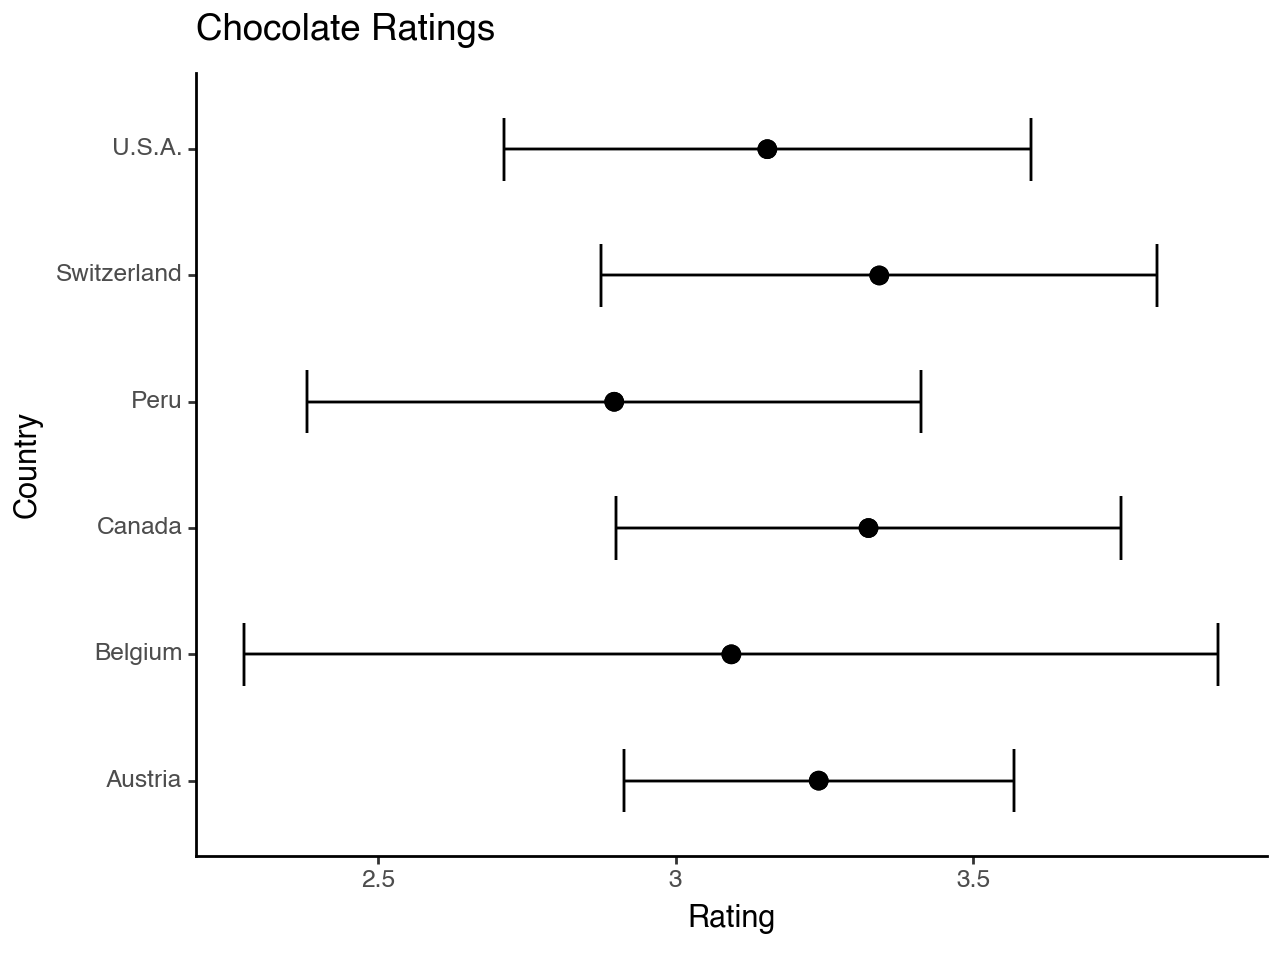

<Figure Size: (640 x 480)>

In [69]:
p = (p +  
     geom_point(aes(x="mean_rating"), shape="o", size=3) + 
     geom_errorbarh(aes(xmin="error_left", xmax="error_right", y = 'location')) +
     p9.labs(title = "Chocolate Ratings", x = 'Rating', y = 'Country')
    ) 
p

In [292]:
#Age pyramid (see Figure 7.10 https://clauswilke.com/dataviz/histograms-density-plots.html)
#This one is more complicated. 
#But think it again in terms of layers.
#We need to layers/geoms: one for the female histogram, another for the male histogram

#First let's build the histograms. 
#One problem is that the native geom_histogram only gives us positive counts
#Another problem is that flipping only one scale of a geom (0 to 50 towards negative) is hard 
#So we need to build our histograms to feed as data

h = np.histogram(titanic_male, bins=10)
bin_edges = h[1]
bin_width = np.diff(h[1])[0]
h = np.array([(h[1] + bin_width/2)[0:-1], h[0]]).transpose()
df_m = pd.DataFrame(h, columns = ['Age_center', 'Counts'])

h = np.histogram(titanic_female, bins = bin_edges)
h = np.array([(h[1] + np.diff(h[1])[0]/2)[0:-1], -h[0]]).transpose()
df_f = pd.DataFrame(h, columns = ['Age_center', 'Counts'])

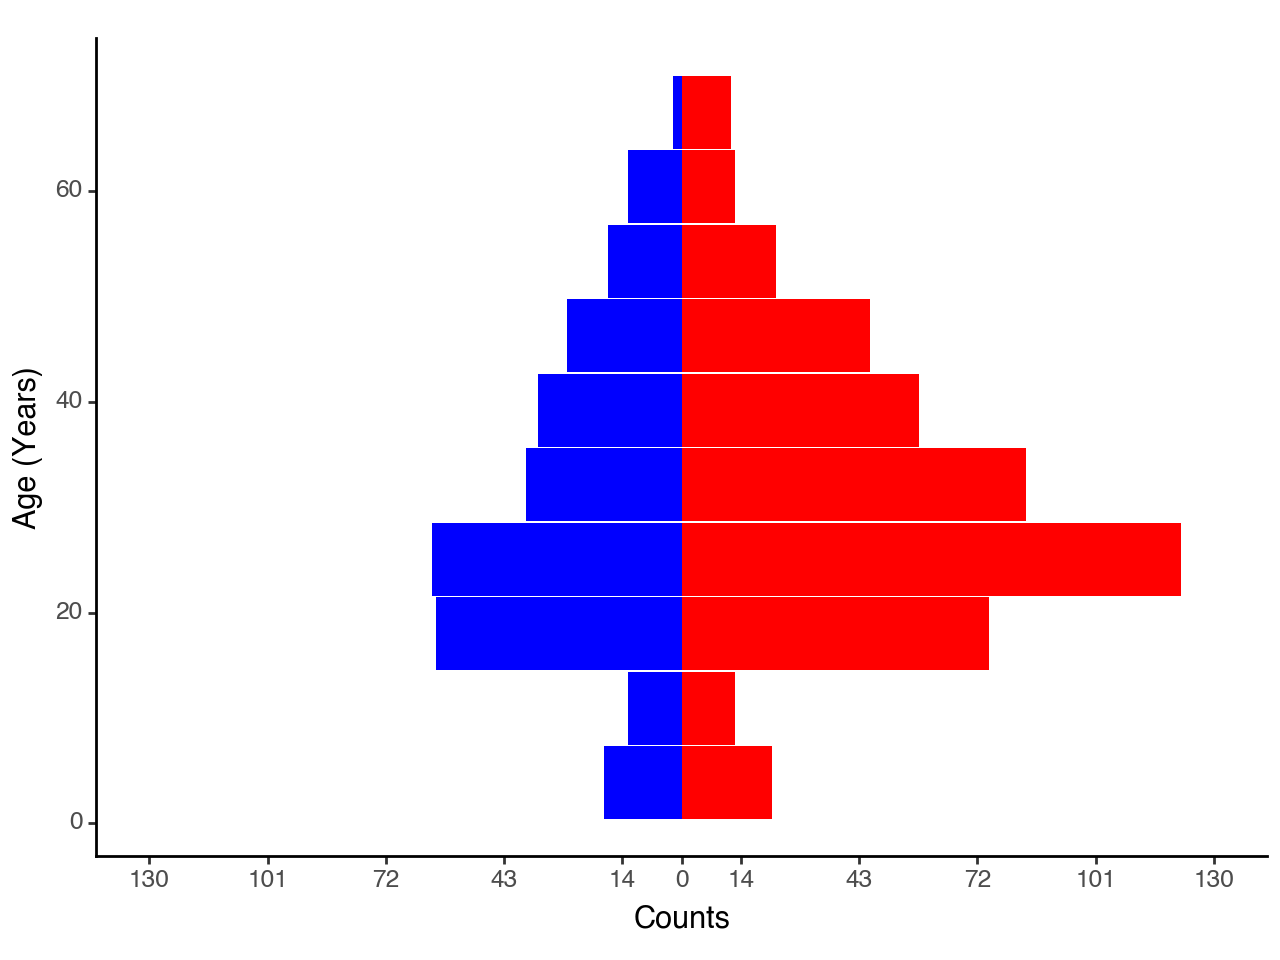

<Figure Size: (640 x 480)>

In [295]:
breaks = np.sort(np.append(np.linspace(-130, 130, df_m.shape[0]), 0))
labels = list(np.array(np.array(np.abs(breaks),dtype=int), dtype = str))
(ggplot() +
 geom_bar(df_f, aes(x='Age_center', y = 'Counts'), stat = "identity", fill = 'blue', width = 0.98*bin_width) +
 geom_bar(df_m, aes(x='Age_center', y = 'Counts'), stat = "identity", fill = 'red', width = 0.98*bin_width) +
 coord_flip() + p9.scale_y_continuous(breaks = breaks, labels = labels, limits = [-130,130]) +
 p9.labs(x = 'Age (Years)') + p9.theme_classic()
)

## Exercise (Densities + Faceting)
Learn to plot on the same chart or on different panels.

1) Load titanic_all.csv data
2) Drop unnecesary columns "name", "class", "survived"
3) Remove NaN
4) Plot, with plotnine, age densities with geom_density: for male, for female. Use facet_grid. Change the defaul theme to one of your preference
5) Do not use facet_grid. Both distributions in the same chart. Fill each sex distribution with color and make it slightly transparent. Change the plot labels and put a title of your liking. Do the same for the legend.